## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練

In [ ]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

In [1]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

C:\Users\10709151\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\10709151\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\10709151\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.ui

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x
def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
  

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [7]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [8]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 4s 83us/step - loss: 1.8994 - acc: 0.3125 - val_loss: 1.7070 - val_acc: 0.3867
Epoch 2/100
50000/50000 [==============================] - 3s 52us/step - loss: 1.6823 - acc: 0.3977 - val_loss: 1.6817 - val_acc: 0.4030
Epoch 3/100
50000/50000 [==============================] - 3s 52us/step - loss: 1.5994 - acc: 0.4280 - val_loss: 1.5680 - val_acc: 0.4393
Epoch 4/100
50000/50000 [==============================] - 3s 52us/step - loss: 1.5392 - acc: 0.4503 - val_loss: 1.5324 - val_acc: 0.4575
Epoch 5/100
50000/50000 [==============================] - 3s 51us/step - loss: 1.4852 - acc: 0.4703 - val_loss: 1.4715 - val_acc: 0.4817
Epoch 6/100
50000/50000 [==============================] - 3s 51us/step - loss: 1.4499 - acc: 0.4853 - val_loss: 1.4856 - val_acc: 0.4717
Epoch 7/100
50000/50000 [==============================] - 3s 50us/step - loss: 1.4181 - acc: 0.4919 - val_loss: 1.4532 - 

50000/50000 [==============================] - 3s 51us/step - loss: 0.5143 - acc: 0.8165 - val_loss: 2.0730 - val_acc: 0.5070
Epoch 60/100
50000/50000 [==============================] - 3s 50us/step - loss: 0.5066 - acc: 0.8190 - val_loss: 2.1283 - val_acc: 0.5052
Epoch 61/100
50000/50000 [==============================] - 3s 52us/step - loss: 0.4958 - acc: 0.8228 - val_loss: 2.0986 - val_acc: 0.5066
Epoch 62/100
50000/50000 [==============================] - 3s 51us/step - loss: 0.4952 - acc: 0.8223 - val_loss: 2.1660 - val_acc: 0.5102
Epoch 63/100
50000/50000 [==============================] - 3s 51us/step - loss: 0.4873 - acc: 0.8263 - val_loss: 2.1092 - val_acc: 0.5122
Epoch 64/100
50000/50000 [==============================] - 3s 51us/step - loss: 0.4844 - acc: 0.8262 - val_loss: 2.2302 - val_acc: 0.5096
Epoch 65/100
50000/50000 [==============================] - 3s 51us/step - loss: 0.4697 - acc: 0.8306 - val_loss: 2.2020 - val_acc: 0.5040
Epoch 66/100
50000/50000 [==============

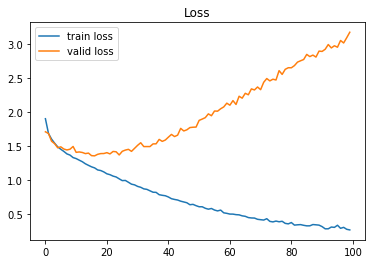

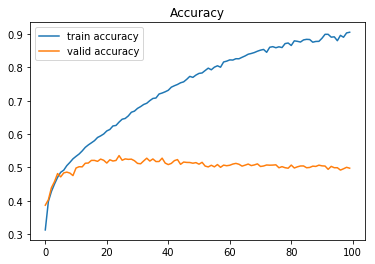

In [10]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## Work
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢

In [15]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 512, 256, 128, 64]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
  

model1 = build_mlp(input_shape=x_train.shape[1:])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               262656    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total para

In [16]:
optimizer1 = keras.optimizers.Adam(lr=LEARNING_RATE)
model1.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer1)

In [17]:
model1.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 69us/step - loss: 1.9563 - acc: 0.2780 - val_loss: 1.7596 - val_acc: 0.3626
Epoch 2/100
50000/50000 [==============================] - 3s 56us/step - loss: 1.7114 - acc: 0.3824 - val_loss: 1.6750 - val_acc: 0.3980
Epoch 3/100
50000/50000 [==============================] - 3s 56us/step - loss: 1.6272 - acc: 0.4167 - val_loss: 1.6250 - val_acc: 0.4205
Epoch 4/100
50000/50000 [==============================] - 3s 56us/step - loss: 1.5680 - acc: 0.4373 - val_loss: 1.5002 - val_acc: 0.4690
Epoch 5/100
50000/50000 [==============================] - 3s 56us/step - loss: 1.5046 - acc: 0.4634 - val_loss: 1.5492 - val_acc: 0.4540
Epoch 6/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.4567 - acc: 0.4791 - val_loss: 1.4746 - val_acc: 0.4819
Epoch 7/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.4278 - acc: 0.4898 - val_loss: 1.4652 - 

50000/50000 [==============================] - 3s 56us/step - loss: 0.2781 - acc: 0.9035 - val_loss: 3.0564 - val_acc: 0.4981
Epoch 60/100
50000/50000 [==============================] - 3s 56us/step - loss: 0.2607 - acc: 0.9059 - val_loss: 2.9895 - val_acc: 0.5048
Epoch 61/100
50000/50000 [==============================] - 3s 56us/step - loss: 0.2522 - acc: 0.9099 - val_loss: 3.1143 - val_acc: 0.4891
Epoch 62/100
50000/50000 [==============================] - 3s 56us/step - loss: 0.2551 - acc: 0.9086 - val_loss: 3.0373 - val_acc: 0.4954
Epoch 63/100
50000/50000 [==============================] - 3s 56us/step - loss: 0.2347 - acc: 0.9164 - val_loss: 3.2661 - val_acc: 0.5049
Epoch 64/100
50000/50000 [==============================] - 3s 54us/step - loss: 0.2516 - acc: 0.9111 - val_loss: 3.1480 - val_acc: 0.4979
Epoch 65/100
50000/50000 [==============================] - 3s 55us/step - loss: 0.2653 - acc: 0.9065 - val_loss: 3.2725 - val_acc: 0.4988
Epoch 66/100
50000/50000 [==============

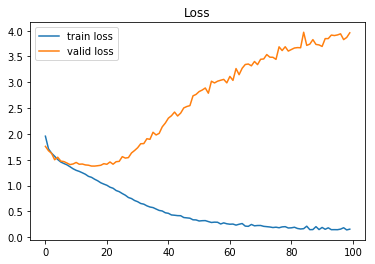

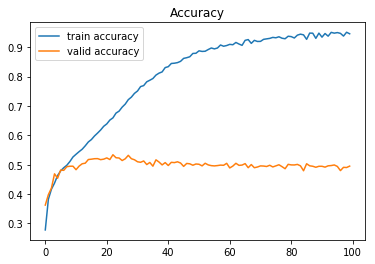

In [18]:
import matplotlib.pyplot as plt


train1_loss = model1.history.history["loss"]
valid1_loss = model1.history.history["val_loss"]

train1_acc = model1.history.history["acc"]
valid1_acc = model1.history.history["val_acc"]

plt.plot(range(len(train1_loss)), train1_loss, label="train loss")
plt.plot(range(len(valid1_loss)), valid1_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train1_acc)), train1_acc, label="train accuracy")
plt.plot(range(len(valid1_acc)), valid1_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()